In [1]:
import sys
sys.path.append('../')


import logging

import matplotlib.pyplot as plt
import numpy as np
from dask.distributed import Client
from sklearn.model_selection import train_test_split

from gpmp_scale.exactGP_discoverkernel.exactGP_DiscoverKernel import train, predict, evaluate
from gpmp_scale.gp_utils import load_climate_dataset, normalize, plot_mean_variance

# 1.Climate Dataset

In [2]:
def plot_climate_map(x_data, y_data):
    index = np.random.choice(y_data.shape[0], 4000, replace=False)
    stations_map = x_data[index]
    y_map = y_data[index]

    fig, ax = plt.subplots(figsize=(15, 6))
    scatter = ax.scatter(stations_map[:, 0], stations_map[:, 1], c=y_map)
    legend1 = ax.legend(*scatter.legend_elements(num=6),
                        loc="lower right", title="℃ Degree")
    ax.set_ylabel('Latitude')
    ax.set_xlabel('Longitude')
    ax.add_artist(legend1)
    plt.savefig('climate_data.png')

In [3]:
def plot_95(test_y, y_pred, xlim = None, ylim = None):
    plt.figure(figsize=(8, 8))

    y_test = test_y[:50].reshape(-1)
    y_predict = y_pred[:50].reshape(-1)
    errors = y_predict * 0.05

    plt.errorbar(y_test, y_predict, yerr=errors, 
                 fmt='o', color='#054bad', ecolor='black', capsize=5, elinewidth=2, label='Predicted')

    plt.plot(y_test, y_test, 'b--', label='True Values')
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
#     plt.xlim(0.34, 0.85)
    plt.xlabel('Y True')
    plt.ylabel('Y Predict')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
logging.info(f'----------------------------------------')
logging.info(f'Training exactGP_DiscoverKernel')
x_data, y_data = load_climate_dataset()
x_data[:, 0] = normalize(x_data[:, 0])
x_data[:, 1] = normalize(x_data[:, 1])
x_data[:, 2] = normalize(x_data[:, 2])
y_data = normalize(y_data)

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, train_size=0.0004, test_size=0.0002, random_state=42)

root - INFO - ----------------------------------------
root - INFO - Training exactGP_DiscoverKernel


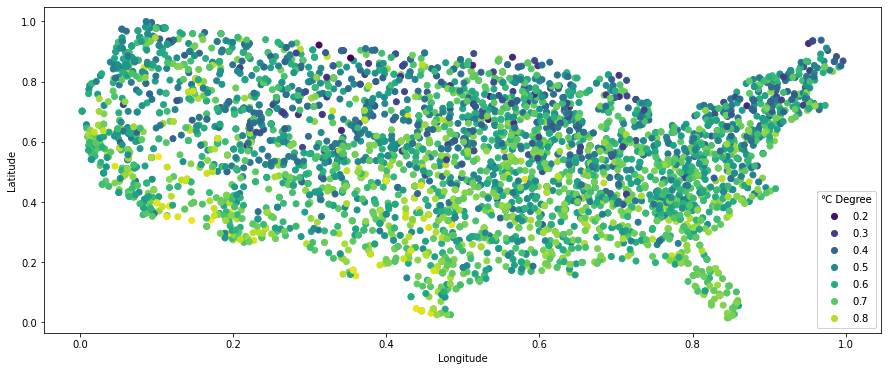

In [4]:
NUM_TRAIN = 20000
BATCH_SIZE = 400
MAX_ITER = 50
INPUT_DIM = 3

plot_climate_map(x_data, y_data)

client = Client()
# client = Client("tcp://10.61.100.71:8080")
client.wait_for_workers(1)

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  model = GP(input_space_dim, train_x, train_y, init_hps,



Transferring the covariance matrix to host done after  36.11167788505554  seconds. sparsity =  0.0001596371224650685


root - INFO - 5. Standard Training


MINRES solve in progress ... 36.11567831039429 seconds.
MINRES solve done after  36.134676933288574 seconds.
logdet() in progress ...  36.134676933288574 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -2.354e+04   1.471e+01     0.062%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lancz

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



MINRES solve in progress ... 8.462498426437378 seconds.
MINRES solve done after  8.53352975845337 seconds.
logdet() in progress ...  8.53352975845337 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +3.128e+04   7.468e+01     0.239%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos t

Transferring the covariance matrix to host done after  8.728662729263306  seconds. sparsity =  0.0006239180539681972
MINRES solve in progress ... 8.737661838531494 seconds.
MINRES solve done after  8.812663078308105 seconds.
logdet() in progress ...  8.812663078308105 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +7.187e+03   9.685e+01     1.348%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

Transferring the covariance matrix to host done after  8.84127140045166  seconds. sparsity =  0.0005807060332610194
MINRES solve in progress ... 8.849865436553955 seconds.
MINRES solve done after  8.894707679748535 seconds.
logdet() in progress ...  8.894707679748535 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -7.244e+03   1.953e+01     0.270%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:  

Transferring the covariance matrix to host done after  8.61100149154663  seconds. sparsity =  0.0005064763641255865
MINRES solve in progress ... 8.618001222610474 seconds.
MINRES solve done after  8.670001029968262 seconds.
logdet() in progress ...  8.670001029968262 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -4.808e+03   2.432e+01     0.506%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:  

Transferring the covariance matrix to host done after  8.96116018295288  seconds. sparsity =  0.0005158036769213358
MINRES solve in progress ... 8.968159437179565 seconds.
MINRES solve done after  9.02116060256958 seconds.
logdet() in progress ...  9.022160530090332 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +5.654e+03   8.925e+01     1.578%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:   

root - INFO - Training time: 223.2665877342224


MINRES solve in progress ... 9.139150381088257 seconds.
MINRES solve done after  9.160818576812744 seconds.
logdet() in progress ...  9.160818576812744 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -4.454e+04   2.178e+01     0.049%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\gp.py:1209: UserWarning: You want to predict at >100 points. 
 When using gp2Scale, this takes a while. 
 Better predict at only a handful of points.
  if b.shape[1] > 100: warnings.warn(

root - INFO - Test MAE: 0.10325068837811044
root - INFO - Test RMSE: 0.12533001350577594


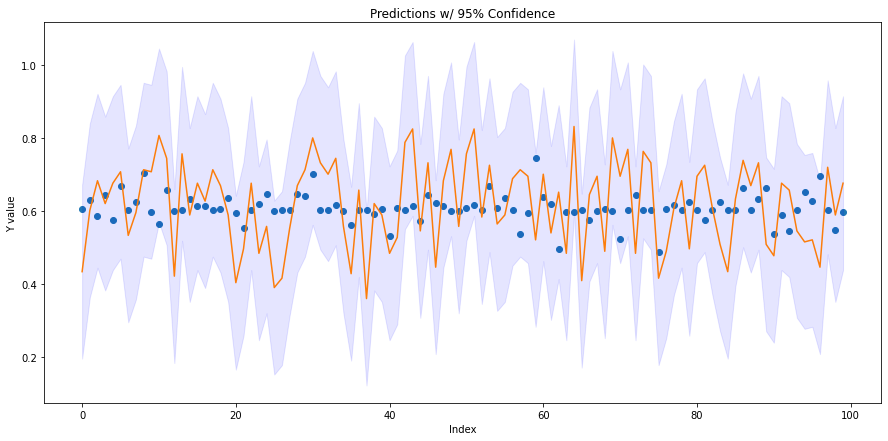

In [5]:
%%time
model, train_time = train(train_x, train_y, INPUT_DIM, max_iter=50, gp2Scale_dask_client=client,
                              batchSize=400, method='hgdl')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='ExactGP_DiscoverKernel_mean_variance')

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  model = GP(input_space_dim, train_x, train_y, init_hps,



Transferring the covariance matrix to host done after  10.744140625  seconds. sparsity =  0.00021807922549217643


root - INFO - 5. Standard Training


MINRES solve in progress ... 10.755140781402588 seconds.
MINRES solve done after  10.81316876411438 seconds.
logdet() in progress ...  10.81316876411438 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +3.292e+04   3.970e+01     0.121%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczo

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



MINRES solve in progress ... 8.897664070129395 seconds.
MINRES solve done after  8.93265175819397 seconds.
logdet() in progress ...  8.93265175819397 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +9.111e+03   4.479e+01     0.492%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos t

Transferring the covariance matrix to host done after  8.452157258987427  seconds. sparsity =  0.00029663290754095766
MINRES solve in progress ... 8.457156896591187 seconds.
MINRES solve done after  8.490157842636108 seconds.
logdet() in progress ...  8.490157842636108 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -5.988e+03   1.784e+01     0.298%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:

Transferring the covariance matrix to host done after  8.392417430877686  seconds. sparsity =  0.00033966690821486656
MINRES solve in progress ... 8.397416591644287 seconds.
MINRES solve done after  8.443418025970459 seconds.
logdet() in progress ...  8.443418025970459 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -4.952e+03   2.000e+01     0.404%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:

Transferring the covariance matrix to host done after  8.978014469146729  seconds. sparsity =  0.0004247183214779643
MINRES solve in progress ... 8.9870126247406 seconds.
MINRES solve done after  9.027014017105103 seconds.
logdet() in progress ...  9.027014017105103 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -1.514e+03   1.896e+01     1.252%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:   

root - INFO - Training time: 164.74192190170288


MINRES solve in progress ... 9.09045958518982 seconds.
MINRES solve done after  9.107459783554077 seconds.
logdet() in progress ...  9.107459783554077 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -4.355e+04   1.672e+01     0.038%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos 

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\gp.py:1209: UserWarning: You want to predict at >100 points. 
 When using gp2Scale, this takes a while. 
 Better predict at only a handful of points.
  if b.shape[1] > 100: warnings.warn(

root - INFO - Test MAE: 0.09759545462045308
root - INFO - Test RMSE: 0.11896907722643742


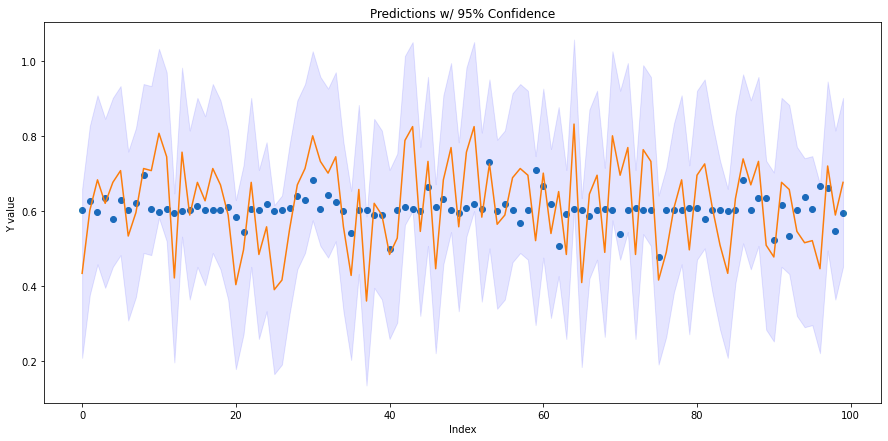

CPU times: total: 5min 52s
Wall time: 5min 17s


In [6]:
%%time
model, train_time = train(train_x, train_y, INPUT_DIM, max_iter=40, gp2Scale_dask_client=client,
                              batchSize=400, method='hgdl')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='ExactGP_DiscoverKernel_mean_variance_400_40')

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP


Transferring the covariance matrix to host done after  7.965471029281616  seconds. sparsity =  0.0004409790460957672


root - INFO - 5. Standard Training


MINRES solve in progress ... 7.974474668502808 seconds.
MINRES solve done after  8.07301378250122 seconds.
logdet() in progress ...  8.07301378250122 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +4.288e+04   8.821e+01     0.206%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos t

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



MINRES solve in progress ... 7.726303577423096 seconds.
MINRES solve done after  7.739386320114136 seconds.
logdet() in progress ...  7.739386320114136 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -3.938e+04   1.510e+01     0.038%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos

Transferring the covariance matrix to host done after  8.405958890914917  seconds. sparsity =  0.00012702197847511056
MINRES solve in progress ... 8.408921480178833 seconds.
MINRES solve done after  8.423816680908203 seconds.
logdet() in progress ...  8.423816680908203 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -3.859e+04   1.300e+01     0.034%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:

Transferring the covariance matrix to host done after  7.758972883224487  seconds. sparsity =  7.966864962557093e-05
Transferring the covariance matrix to host done after  7.811910629272461  seconds. sparsity =  0.00014995845434049898
MINRES solve in progress ... 7.81591010093689 seconds.
MINRES solve done after  7.844910144805908 seconds.
logdet() in progress ...  7.844910144805908 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -8.168e+03   1.226e+01     0.150%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    ----------

Transferring the covariance matrix to host done after  8.290942430496216  seconds. sparsity =  0.00018885114687204607
MINRES solve in progress ... 8.29494333267212 seconds.
MINRES solve done after  8.323950052261353 seconds.
logdet() in progress ...  8.323950052261353 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -1.019e+04   1.569e+01     0.154%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

Transferring the covariance matrix to host done after  8.869729995727539  seconds. sparsity =  0.0001634223905408924
MINRES solve in progress ... 8.872730016708374 seconds.
MINRES solve done after  8.893729448318481 seconds.
logdet() in progress ...  8.893729448318481 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -2.776e+04   1.706e+01     0.061%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

Transferring the covariance matrix to host done after  9.002167701721191  seconds. sparsity =  0.000173916203028325
MINRES solve in progress ... 9.007166624069214 seconds.
MINRES solve done after  9.032598495483398 seconds.
logdet() in progress ...  9.032598495483398 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -1.674e+04   1.821e+01     0.109%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:  

Transferring the covariance matrix to host done after  8.189239501953125  seconds. sparsity =  0.00018871997421595317
MINRES solve in progress ... 8.192238807678223 seconds.
MINRES solve done after  8.217634201049805 seconds.
logdet() in progress ...  8.217634201049805 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -1.821e+04   1.722e+01     0.095%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:

root - INFO - Training time: 261.47104477882385


MINRES solve in progress ... 8.076675653457642 seconds.
MINRES solve done after  8.09067440032959 seconds.
logdet() in progress ...  8.09067440032959 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -4.513e+04   1.409e+01     0.031%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos t

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\gp.py:1209: UserWarning: You want to predict at >100 points. 
 When using gp2Scale, this takes a while. 
 Better predict at only a handful of points.
  if b.shape[1] > 100: warnings.warn(

root - INFO - Test MAE: 0.10381879167019407
root - INFO - Test RMSE: 0.1255812865292257


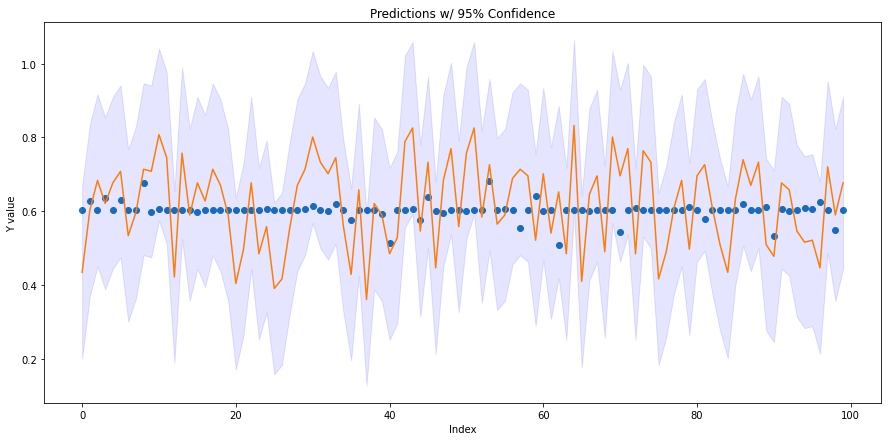

CPU times: total: 4min 39s
Wall time: 6min 19s


In [10]:
%%time
model, train_time = train(train_x, train_y, INPUT_DIM, max_iter=50, gp2Scale_dask_client=client,
                              batchSize=1000, method='hgdl')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='ExactGP_DiscoverKernel_mean_variance_1000_50')

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  model = GP(input_space_dim, train_x, train_y, init_hps,



Transferring the covariance matrix to host done after  8.00899076461792  seconds. sparsity =  0.00024393897769334964


root - INFO - 5. Standard Training


MINRES solve in progress ... 8.015998601913452 seconds.
MINRES solve done after  8.082723379135132 seconds.
logdet() in progress ...  8.082723379135132 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +4.439e+04   5.978e+01     0.135%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



MINRES solve in progress ... 6.028456687927246 seconds.
MINRES solve done after  6.069456100463867 seconds.
logdet() in progress ...  6.069456100463867 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +2.479e+04   3.448e+01     0.139%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos

Transferring the covariance matrix to host done after  6.521852016448975  seconds. sparsity =  0.0002934753943192927
MINRES solve in progress ... 6.527820587158203 seconds.
MINRES solve done after  6.595975399017334 seconds.
logdet() in progress ...  6.595975399017334 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +2.712e+04   5.972e+01     0.220%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

Transferring the covariance matrix to host done after  6.254343271255493  seconds. sparsity =  0.0001358527090727938
MINRES solve in progress ... 6.258376121520996 seconds.
MINRES solve done after  6.287103652954102 seconds.
logdet() in progress ...  6.287103652954102 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +4.712e+03   2.459e+01     0.522%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

Transferring the covariance matrix to host done after  5.870197772979736  seconds. sparsity =  0.00030776384435798437
MINRES solve in progress ... 5.876197338104248 seconds.
MINRES solve done after  5.920167446136475 seconds.
logdet() in progress ...  5.920167446136475 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -4.474e+03   1.485e+01     0.332%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:

Transferring the covariance matrix to host done after  6.276321649551392  seconds. sparsity =  0.00019092180094322695
MINRES solve in progress ... 6.279291391372681 seconds.
MINRES solve done after  6.307982921600342 seconds.
logdet() in progress ...  6.30898118019104 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -2.017e+04   1.165e+01     0.058%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

Transferring the covariance matrix to host done after  6.228106498718262  seconds. sparsity =  0.00019703538366469997
MINRES solve in progress ... 6.232106685638428 seconds.
MINRES solve done after  6.25733208656311 seconds.
logdet() in progress ...  6.25733208656311 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -1.700e+04   1.210e+01     0.071%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:  

Transferring the covariance matrix to host done after  6.5218825340271  seconds. sparsity =  0.00019795359225735032
MINRES solve in progress ... 6.5248801708221436 seconds.
MINRES solve done after  6.54070520401001 seconds.
logdet() in progress ...  6.54070520401001 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -3.411e+04   1.083e+01     0.032%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:   

root - INFO - Training time: 206.8503668308258


MINRES solve in progress ... 6.44528865814209 seconds.
MINRES solve done after  6.462285757064819 seconds.
logdet() in progress ...  6.462285757064819 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -3.410e+04   1.101e+01     0.032%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos 

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\gp.py:1209: UserWarning: You want to predict at >100 points. 
 When using gp2Scale, this takes a while. 
 Better predict at only a handful of points.
  if b.shape[1] > 100: warnings.warn(

root - INFO - Test MAE: 0.10019816375760343
root - INFO - Test RMSE: 0.12174064677210356


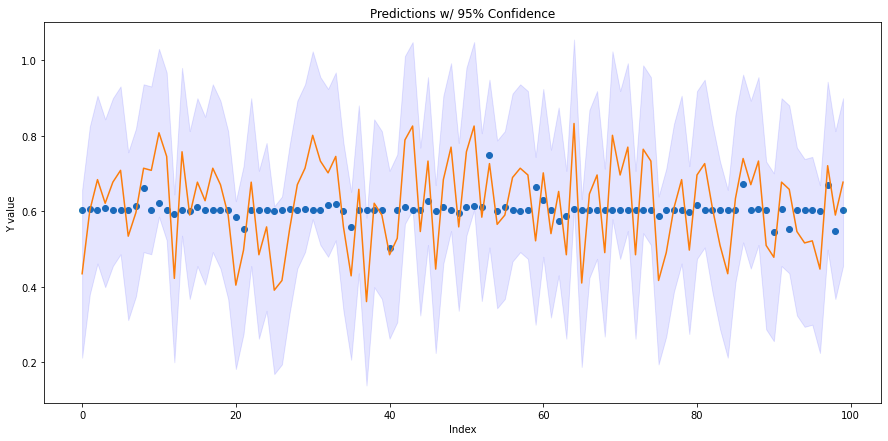

CPU times: total: 6min 49s
Wall time: 5min 28s


In [11]:
%%time
model, train_time = train(train_x, train_y, INPUT_DIM, max_iter=50, gp2Scale_dask_client=client,
                              batchSize=300, method='hgdl')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='ExactGP_DiscoverKernel_mean_variance_300_50')

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  model = GP(input_space_dim, train_x, train_y, init_hps,



Transferring the covariance matrix to host done after  6.219391584396362  seconds. sparsity =  0.0003113804618759745


root - INFO - 5. Standard Training


MINRES solve in progress ... 6.227387428283691 seconds.
MINRES solve done after  6.2913618087768555 seconds.
logdet() in progress ...  6.2913618087768555 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +2.837e+04   6.336e+01     0.223%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lancz

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  6.718402147293091  seconds. sparsity =  6.39091919435516e-05
Transferring the covariance matrix to host done after  5.775119781494141  seconds. sparsity =  5.435232699963977e-05
Transferring the covariance matrix to host done after  6.187507629394531  seconds. sparsity =  8.193137794317358e-05
Transferring the covariance matrix to host done after  6.332957029342651  seconds. sparsity =  0.00011678582656214618
MINRES solve in progress ... 6.336957693099976 seconds.
MINRES solve done after  6.384771347045898 seconds.
logdet() in progress ...  6.384771347045898 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +2.891e+04   4.687e+01     0.162%

root - INFO - Training time: 106.07019877433777
root - INFO - Test MAE: 0.107864626755672
root - INFO - Test RMSE: 0.12974153574012887


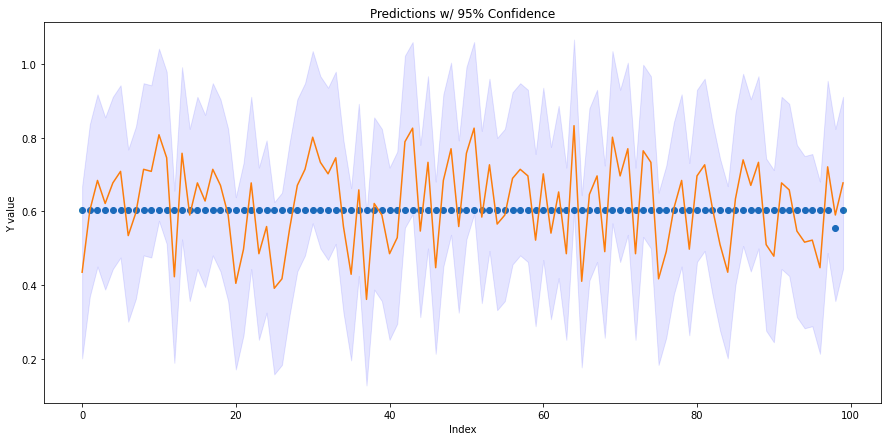

CPU times: total: 4min 20s
Wall time: 3min 9s


In [12]:
%%time
model, train_time = train(train_x, train_y, INPUT_DIM, max_iter=40, gp2Scale_dask_client=client,
                              batchSize=300, method='hgdl')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='ExactGP_DiscoverKernel_mean_variance_300_40')

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP


Transferring the covariance matrix to host done after  9.81911563873291  seconds. sparsity =  0.00022029510643260306


root - INFO - 5. Standard Training


MINRES solve in progress ... 9.831292629241943 seconds.
MINRES solve done after  9.885494470596313 seconds.
logdet() in progress ...  9.885494470596313 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +1.868e+04   2.909e+01     0.156%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  9.147306680679321  seconds. sparsity =  9.818273308554132e-05
Transferring the covariance matrix to host done after  9.143244504928589  seconds. sparsity =  0.0001942713884113137
MINRES solve in progress ... 9.14724612236023 seconds.
MINRES solve done after  9.199246168136597 seconds.
logdet() in progress ...  9.199246168136597 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +2.750e+04   3.852e+01     0.140%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -----------

Transferring the covariance matrix to host done after  10.240919828414917  seconds. sparsity =  0.00027396346172547264
MINRES solve in progress ... 10.245920896530151 seconds.
MINRES solve done after  10.297248601913452 seconds.
logdet() in progress ...  10.297248601913452 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +1.048e+04   3.918e+01     0.374%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
expon

root - INFO - Training time: 120.8394467830658


MINRES solve in progress ... 8.590495586395264 seconds.
MINRES solve done after  8.620523452758789 seconds.
logdet() in progress ...  8.620523452758789 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -1.062e+04   1.715e+01     0.161%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\gp.py:1209: UserWarning: You want to predict at >100 points. 
 When using gp2Scale, this takes a while. 
 Better predict at only a handful of points.
  if b.shape[1] > 100: warnings.warn(

root - INFO - Test MAE: 0.09717707427061871
root - INFO - Test RMSE: 0.11850195935942713


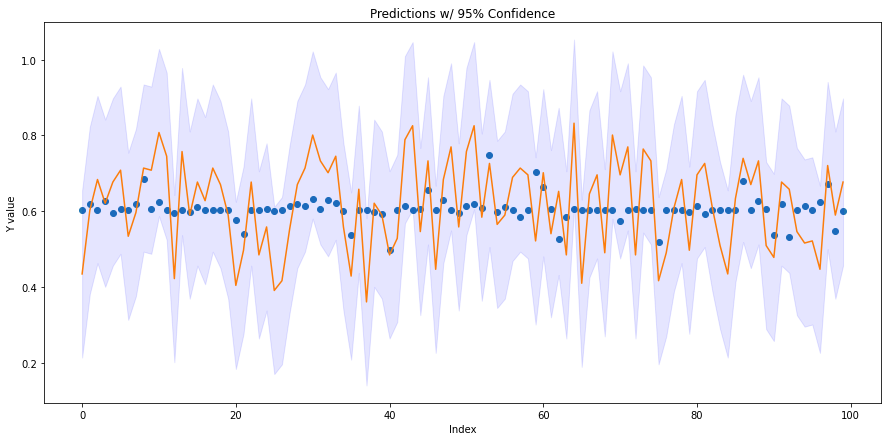

CPU times: total: 4min 59s
Wall time: 4min 14s


In [14]:
%%time
model, train_time = train(train_x, train_y, INPUT_DIM, max_iter=40, gp2Scale_dask_client=client,
                              batchSize=400, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='ExactGP_DiscoverKernel_mean_variance_400_40_mcmc')

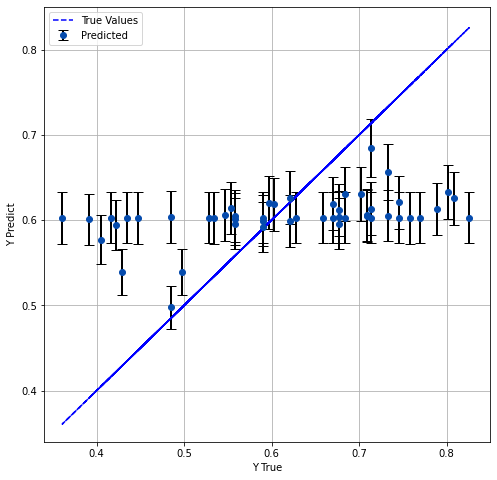

In [15]:
# batchSize: 400, iter: 40, MCMC
plot_95(test_y, mean1)

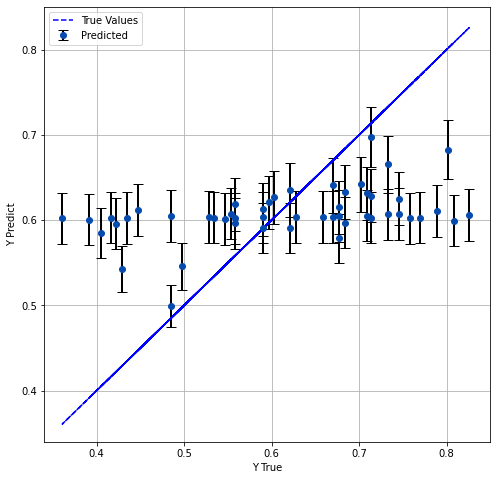

In [8]:
# batchSize: 400, iter: 40, HGDL
plot_95(test_y, mean1)

# 2. BikeSharing

In [20]:
def clean_df(df):
    df['season'] = normalize(df['season'])
    df['mnth'] = normalize(df['mnth'])
    df['hr'] = normalize(df['hr'])
    df['weekday'] = normalize(df['weekday'])
    df['weathersit'] = normalize(df['weathersit'])
    df['cnt'] = normalize(df['cnt'])
    df['yr'] = df['yr'].astype(float)
    df['holiday'] = df['holiday'].astype(float)
    df['workingday'] = df['workingday'].astype(float)
    return df

In [21]:
from gpmp_scale.gp_utils import load_bike_sharing_dataset
df = load_bike_sharing_dataset()
logging.info(df.describe())

# Chuan hoa du lieu
df = df.drop(['dteday', 'casual', 'registered', 'instant'], axis=1)
df = clean_df(df)

y_data = df['cnt']
df = df.drop(['cnt'], axis=1)

train_y_full = y_data.to_numpy()
df_array = df.to_numpy()

# Tach tap train-test
train_x, test_x, train_y, test_y = train_test_split(df_array, train_y_full, test_size=0.15, random_state=42)
logging.info(f'train_x.shape = {train_x.shape}, train_y.shape= {train_y.shape}, '
             f'test_x.shape={test_x.shape}, test_y.shape={test_y.shape}')
hps_bounds = np.array([[0.1, 10.],  ##signal var of stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           [0.01, 0.05],  ##length scale for stat kernel
                           ])
INPUT_DIM = 12

root - INFO -           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.

In [22]:
train_x.shape

(14772, 12)

root - INFO -           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.

Transferring the covariance matrix to host done after  33.61521053314209  seconds. sparsity =  8.608031447516432e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  5.765746355056763  seconds. sparsity =  8.615408284818272e-05
Transferring the covariance matrix to host done after  5.7298150062561035  seconds. sparsity =  8.615408284818272e-05
Transferring the covariance matrix to host done after  5.735032081604004  seconds. sparsity =  8.618359019739008e-05
Transferring the covariance matrix to host done after  5.658482789993286  seconds. sparsity =  8.619834387199375e-05
Transferring the covariance matrix to host done after  5.762681722640991  seconds. sparsity =  8.61688365227864e-05
Transferring the covariance matrix to host done after  5.658230304718018  seconds. sparsity =  8.619834387199375e-05


py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  5.774335145950317  seconds. sparsity =  8.618359019739008e-05
Transferring the covariance matrix to host done after  5.778063058853149  seconds. sparsity =  8.619834387199375e-05
Transferring the covariance matrix to host done after  5.9329493045806885  seconds. sparsity =  8.619834387199375e-05
Transferring the covariance matrix to host done after  5.868682384490967  seconds. sparsity =  8.619834387199375e-05
Transferring the covariance matrix to host done after  5.847840070724487  seconds. sparsity =  8.619834387199375e-05
Transferring the covariance matrix to host done after  5.915886640548706  seconds. sparsity =  8.619834387199375e-05
Transferring the covariance matrix to host done after  6.211683988571167  seconds. sparsity =  8.619834387199375e-05
Transferring the covariance matrix to host done after  5.968836307525635  seconds. sparsity =  8.618359019739008e-05
Transferring the covariance matrix to host done after  5.771828

root - INFO - Training time: 218.50475692749023
root - INFO - Test MAE: 0.1451463957198886
root - INFO - Test RMSE: 0.18294820718945323


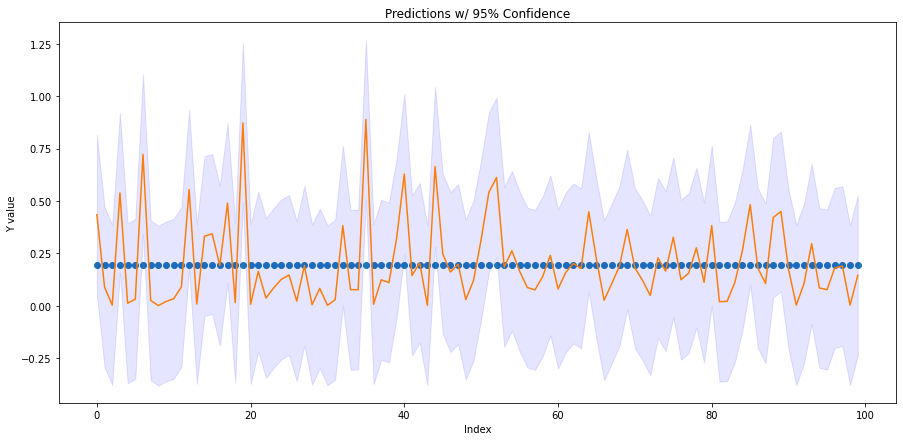

In [19]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=40,
                          gp2Scale_dask_client=client, batchSize=400, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_400_40')

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 65509 instead
  warnings.warn(

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. No

Transferring the covariance matrix to host done after  26.526119709014893  seconds. sparsity =  8.599179242754226e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  3.0687568187713623  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  2.786478281021118  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  3.011756420135498  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  2.6644015312194824  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  2.8423194885253906  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  3.0774028301239014  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  2.7259950637817383  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  3.179678201675415  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  2.73

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  3.128528594970703  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  2.801614999771118  seconds. sparsity =  8.60212997767496e-05
Transferring the covariance matrix to host done after  2.7496743202209473  seconds. sparsity =  8.60212997767496e-05
Transferring the covariance matrix to host done after  3.352701187133789  seconds. sparsity =  8.60212997767496e-05
Transferring the covariance matrix to host done after  2.759653091430664  seconds. sparsity =  8.60212997767496e-05
Transferring the covariance matrix to host done after  2.9570322036743164  seconds. sparsity =  8.60212997767496e-05


root - INFO - Training time: 91.25940442085266
root - INFO - Test MAE: 0.145166550756161
root - INFO - Test RMSE: 0.1829644840147394


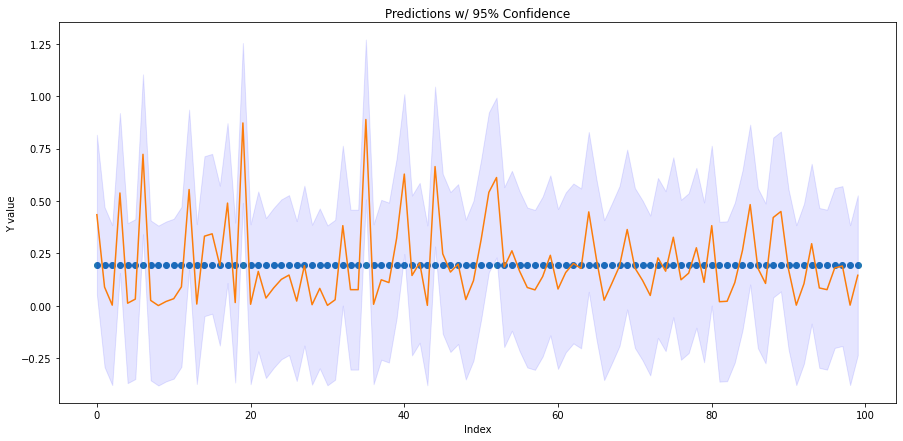

CPU times: total: 1min 59s
Wall time: 2min 7s


In [23]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=40,
                          gp2Scale_dask_client=client, batchSize=200, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_200_40')

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 49924 instead
  warnings.warn(

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. No

Transferring the covariance matrix to host done after  28.41655659675598  seconds. sparsity =  8.610982182437168e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  5.690483808517456  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.87433123588562  seconds. sparsity =  9.459318472148703e-05
Transferring the covariance matrix to host done after  5.789784908294678  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.859008312225342  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.731334924697876  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.887012958526611  seconds. sparsity =  9.475547514212749e-05
Transferring the covariance matrix to host done after  5.847948312759399  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.837182283401489  seconds. sparsity =  9.459318472148703e-05
Transferring the covariance matrix to host done after  5.81490063

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  6.033346652984619  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  6.046532869338989  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  6.596134662628174  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.697116136550903  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.948125839233398  seconds. sparsity =  9.459318472148703e-05
Transferring the covariance matrix to host done after  5.754054307937622  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.914138317108154  seconds. sparsity =  8.613932917357904e-05
Transferring the covariance matrix to host done after  5.959346771240234  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.9472713

root - INFO - Training time: 171.45668601989746
root - INFO - Test MAE: 0.1451635909688104
root - INFO - Test RMSE: 0.18296183110284636


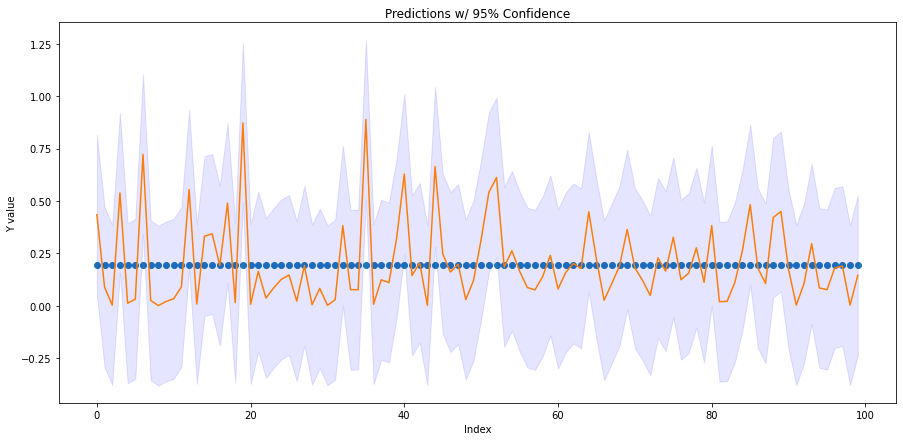

CPU times: total: 2min 9s
Wall time: 3min 30s


In [24]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=50,
                          gp2Scale_dask_client=client, batchSize=400, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_400_50')

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50773 instead
  warnings.warn(

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. No

Transferring the covariance matrix to host done after  37.16573762893677  seconds. sparsity =  8.608031447516432e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  5.846808195114136  seconds. sparsity =  8.600654610214593e-05
Transferring the covariance matrix to host done after  5.819934606552124  seconds. sparsity =  8.603605345135329e-05


py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  5.9144744873046875  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  5.8262574672698975  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  5.738611698150635  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  5.78762149810791  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  5.830803632736206  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  5.865445613861084  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  6.387193202972412  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  5.861911296844482  seconds. sparsity =  8.603605345135329e-05
Transferring the covariance matrix to host done after  5.872662

root - INFO - Training time: 138.41841459274292
root - INFO - Test MAE: 0.14516559116632916
root - INFO - Test RMSE: 0.18296416885644196


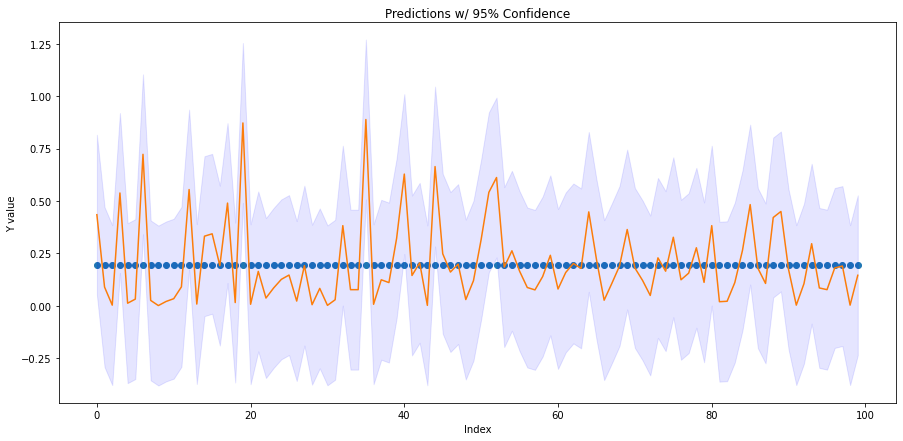

CPU times: total: 1min 52s
Wall time: 3min 1s


In [25]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=40,
                          gp2Scale_dask_client=client, batchSize=400, method='hgdl')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_400_40_hgdl')

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51521 instead
  warnings.warn(

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. No

Transferring the covariance matrix to host done after  31.66739296913147  seconds. sparsity =  8.610982182437168e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  6.0857765674591064  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  6.0861594676971436  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  5.868461608886719  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  5.911675214767456  seconds. sparsity =  8.599179242754226e-05


py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  5.916561603546143  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  5.962531566619873  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  6.332484483718872  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  5.900515794754028  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  6.075651168823242  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  6.517122268676758  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  6.511896371841431  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  6.5328288078308105  seconds. sparsity =  8.599179242754226e-05
Transferring the covariance matrix to host done after  6.186589

root - INFO - Training time: 408.11729550361633
root - INFO - Test MAE: 0.14516528294449274
root - INFO - Test RMSE: 0.1829638862265817


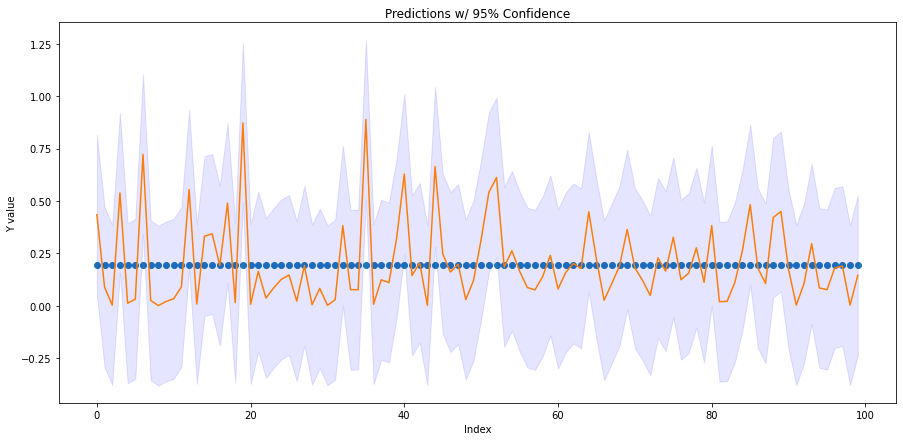

CPU times: total: 3min 39s
Wall time: 7min 26s


In [26]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=100,
                          gp2Scale_dask_client=client, batchSize=400, method='hgdl')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_400_100_hgdl')

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52959 instead
  warnings.warn(

root - INFO - MAX_INTER: 50, NUM_TRAIN:20000, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. No

Transferring the covariance matrix to host done after  35.055917501449585  seconds. sparsity =  6.793394078668017e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  9.904052972793579  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  9.554181575775146  seconds. sparsity =  6.793394078668017e-05


py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  11.592975378036499  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  11.467369794845581  seconds. sparsity =  6.793394078668017e-05
Transferring the covariance matrix to host done after  10.40962529182434  seconds. sparsity =  6.793394078668017e-05
Transferring the covariance matrix to host done after  10.18972897529602  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  10.169487476348877  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  9.824876070022583  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  10.04769492149353  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  9.825120210647583  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  9.9359

root - INFO - Training time: 188.96818017959595
root - INFO - Test MAE: 0.14379669019146832
root - INFO - Test RMSE: 0.18234043996135355


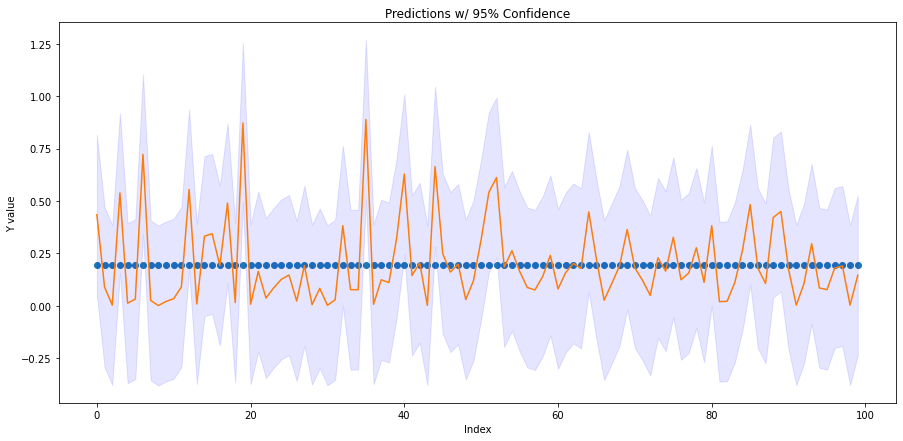

CPU times: total: 1min 36s
Wall time: 3min 29s


In [28]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=40,
                          gp2Scale_dask_client=client, batchSize=400, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_400_40_mcmc')

root - INFO - MAX_INTER: 100, NUM_TRAIN:14772, BATCH_SIZE: 300
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  model = GP(input_space_dim, train_x, train_y, init_hps,



Transferring the covariance matrix to host done after  31.411850452423096  seconds. sparsity =  6.841054155852412e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  5.004261255264282  seconds. sparsity =  6.793394078668017e-05
Transferring the covariance matrix to host done after  4.999820709228516  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  5.535496711730957  seconds. sparsity =  6.793394078668017e-05
Transferring the covariance matrix to host done after  5.316413402557373  seconds. sparsity =  6.793394078668017e-05


py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  5.277038335800171  seconds. sparsity =  6.793394078668017e-05
Transferring the covariance matrix to host done after  5.267199993133545  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  5.405673265457153  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  5.341309547424316  seconds. sparsity =  6.793394078668017e-05
Transferring the covariance matrix to host done after  5.519706964492798  seconds. sparsity =  6.793394078668017e-05
Transferring the covariance matrix to host done after  5.039565324783325  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  4.8823161125183105  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  4.722427845001221  seconds. sparsity =  6.794310618613871e-05
Transferring the covariance matrix to host done after  4.977153

root - INFO - Training time: 230.1900475025177
root - INFO - Test MAE: 0.1438120247714013
root - INFO - Test RMSE: 0.18235020750471592


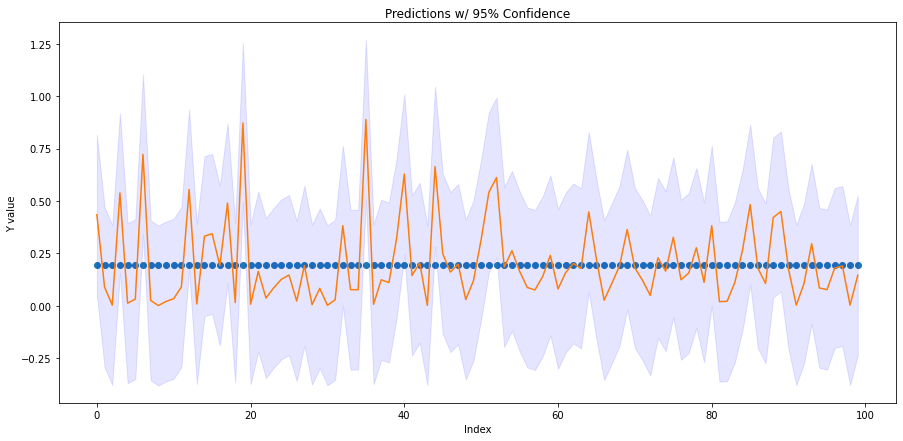

CPU times: total: 2min 48s
Wall time: 4min 8s


In [5]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=100,
                          gp2Scale_dask_client=client, batchSize=300, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_300_100_mcmc')

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51151 instead
  warnings.warn(

root - INFO - MAX_INTER: 200, NUM_TRAIN:14772, BATCH_SIZE: 300
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. N

Transferring the covariance matrix to host done after  30.84476137161255  seconds. sparsity =  6.786061759101186e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  5.086775064468384  seconds. sparsity =  7.664107027229082e-05
Transferring the covariance matrix to host done after  4.7816550731658936  seconds. sparsity =  7.76126026148958e-05
Transferring the covariance matrix to host done after  4.816158056259155  seconds. sparsity =  7.663190487283228e-05


py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  4.826119661331177  seconds. sparsity =  6.792477538722163e-05
Transferring the covariance matrix to host done after  4.801622152328491  seconds. sparsity =  6.792477538722163e-05
Transferring the covariance matrix to host done after  5.150299549102783  seconds. sparsity =  6.792477538722163e-05
Transferring the covariance matrix to host done after  5.373584508895874  seconds. sparsity =  7.659524327499814e-05
Transferring the covariance matrix to host done after  4.913120269775391  seconds. sparsity =  7.663190487283228e-05
Transferring the covariance matrix to host done after  5.544012546539307  seconds. sparsity =  6.792477538722163e-05
Transferring the covariance matrix to host done after  4.866795301437378  seconds. sparsity =  6.792477538722163e-05
Transferring the covariance matrix to host done after  4.962836265563965  seconds. sparsity =  7.663190487283228e-05
Transferring the covariance matrix to host done after  5.2758014

Transferring the covariance matrix to host done after  6.7319841384887695  seconds. sparsity =  7.647609308203715e-05
Transferring the covariance matrix to host done after  10.812365531921387  seconds. sparsity =  7.647609308203715e-05
Transferring the covariance matrix to host done after  5.756717681884766  seconds. sparsity =  7.653108547878837e-05
Transferring the covariance matrix to host done after  14.088570594787598  seconds. sparsity =  7.647609308203715e-05
Transferring the covariance matrix to host done after  17.176812410354614  seconds. sparsity =  7.647609308203715e-05
Transferring the covariance matrix to host done after  6.0189738273620605  seconds. sparsity =  7.647609308203715e-05
Transferring the covariance matrix to host done after  10.435572147369385  seconds. sparsity =  7.653108547878837e-05
Transferring the covariance matrix to host done after  5.51854133605957  seconds. sparsity =  7.647609308203715e-05
Transferring the covariance matrix to host done after  20.0

root - INFO - Training time: 990.5162899494171
root - INFO - Test MAE: 0.14384567455419814
root - INFO - Test RMSE: 0.1823773143758383


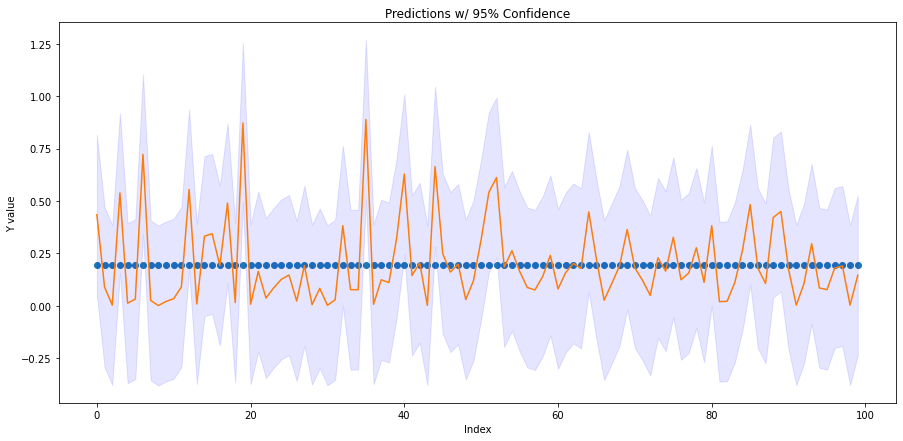

CPU times: total: 6min 5s
Wall time: 17min 17s


In [25]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=200,
                          gp2Scale_dask_client=client, batchSize=300, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_300_100_mcmc')

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56543 instead
  warnings.warn(

root - INFO - MAX_INTER: 10, NUM_TRAIN:14772, BATCH_SIZE: 1000
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. N

Transferring the covariance matrix to host done after  33.57755780220032  seconds. sparsity =  7.662273947337374e-05


root - INFO - 5. Standard Training


Transferring the covariance matrix to host done after  10.237837314605713  seconds. sparsity =  6.780562519426064e-05
Transferring the covariance matrix to host done after  9.688129901885986  seconds. sparsity =  6.780562519426064e-05
Transferring the covariance matrix to host done after  9.771635055541992  seconds. sparsity =  6.780562519426064e-05
Transferring the covariance matrix to host done after  9.388699054718018  seconds. sparsity =  6.780562519426064e-05
Transferring the covariance matrix to host done after  9.569591999053955  seconds. sparsity =  6.786061759101186e-05


py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



Transferring the covariance matrix to host done after  9.783274173736572  seconds. sparsity =  6.78697829904704e-05
Transferring the covariance matrix to host done after  9.304710149765015  seconds. sparsity =  6.787894838992894e-05
Transferring the covariance matrix to host done after  9.244086742401123  seconds. sparsity =  6.786061759101186e-05


root - INFO - Training time: 110.67717123031616
root - INFO - Test MAE: 0.1438465665005321
root - INFO - Test RMSE: 0.18237906324197004


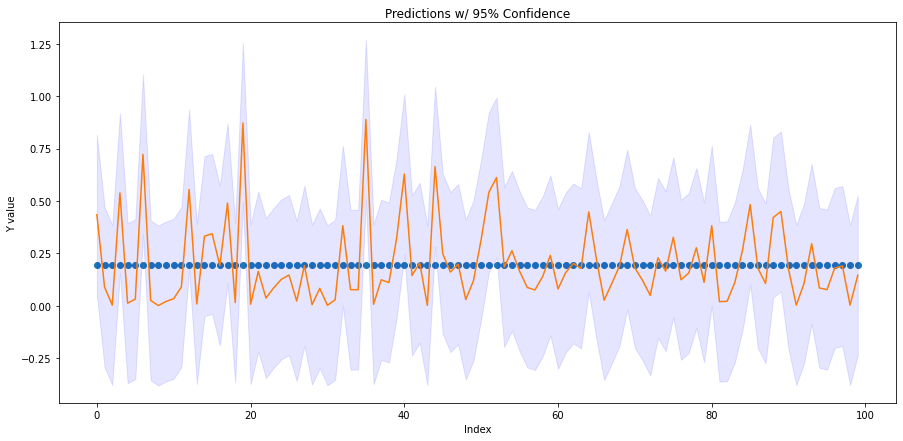

CPU times: total: 46.7 s
Wall time: 2min 9s


In [26]:
%%time
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, hyperparameter_bounds=hps_bounds, max_iter=10,
                          gp2Scale_dask_client=client, batchSize=1000, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='BikeSharing_ExactGP_DiscoverKernel_mean_variance_1000_10_mcmc')

# 3. 3D Road Dataset

In [4]:
def clean_df(df):
    df['LONGITUDE'] = normalize(df['LONGITUDE'])
    df['LATITUDE'] = normalize(df['LATITUDE'])
    df['ALTITUDE'] = normalize(df['ALTITUDE'])
    return df

In [5]:
from gpmp_scale.gp_utils import load_3d_road_dataset
df = load_3d_road_dataset()
print(df.describe())

# Chuan hoa du lieu
df = clean_df(df)

y_data = df['ALTITUDE']
df = df.drop(['ALTITUDE', 'OSM_ID'], axis=1)
train_y_full = y_data.to_numpy()
df_array = df.to_numpy()

# Tach tap train-test
train_x, test_x, train_y, test_y = train_test_split(df_array, train_y_full, train_size=0.046, test_size=0.023,
                                                    random_state=42)
logging.info(f'train_x.shape = {train_x.shape}, train_y.shape= {train_y.shape}, '
             f'test_x.shape={test_x.shape}, test_y.shape={test_y.shape}')


hps_bounds = np.array([[0.1, 10.],  ##signal var of stat kernel
                           [0.001, 0.05],  ##length scale for stat kernel
                           [0.001, 0.05],  ##length scale for stat kernel
                           [0.001, 0.05],  ##length scale for stat kernel
                           ])
INPUT_DIM = 2

root - INFO - train_x.shape = (20004, 2), train_y.shape= (20004,), test_x.shape=(10003, 2), test_y.shape=(10003,)


             OSM_ID      LONGITUDE       LATITUDE       ALTITUDE
count  4.348740e+05  434874.000000  434874.000000  434874.000000
mean   9.786998e+07       9.731836      57.083758      22.185405
std    3.775233e+07       0.627349       0.289479      18.617989
min    4.482444e+06       8.146126      56.582486      -8.608184
25%    8.267897e+07       9.337649      56.846049       7.028053
50%    1.019797e+08       9.887195      57.042498      17.574678
75%    1.259547e+08      10.172359      57.308669      31.810224
max    1.577424e+08      11.199326      57.750511     134.441947


py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61844 instead
  warnings.warn(

root - INFO - MAX_INTER: 40, NUM_TRAIN:20004, BATCH_SIZE: 400
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. No

Transferring the covariance matrix to host done after  29.706680059432983  seconds. sparsity =  0.02074942939826352
MINRES solve in progress ... 29.981565952301025 seconds.
MINRES solve done after  31.272921800613403 seconds.
logdet() in progress ...  31.272921800613403 seconds.


root - INFO - 5. Standard Training


                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -8.282e+04   1.069e+02     0.129%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos tol:                2.220e-16
data type:                     64-bit    orthogonalization:               none

             convergence                          

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -3.691e+04   8.691e+01     0.235%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos tol:                2.220e-16
data type:                     64-bit    orthogonalization:               none

             convergence                          

Transferring the covariance matrix to host done after  7.098677635192871  seconds. sparsity =  0.002222325980714675
MINRES solve in progress ... 7.128095626831055 seconds.
MINRES solve done after  7.396566867828369 seconds.
logdet() in progress ...  7.396566867828369 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -1.287e+04   6.909e+01     0.537%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:  

Transferring the covariance matrix to host done after  7.2507405281066895  seconds. sparsity =  0.013221066044739462
MINRES solve in progress ... 7.431206941604614 seconds.
MINRES solve done after  8.310666561126709 seconds.
logdet() in progress ...  8.310666561126709 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -7.275e+04   9.971e+01     0.137%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

Transferring the covariance matrix to host done after  7.540444374084473  seconds. sparsity =  0.008791323119099435
MINRES solve in progress ... 7.660447597503662 seconds.
MINRES solve done after  8.324500799179077 seconds.
logdet() in progress ...  8.324500799179077 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -6.005e+04   9.770e+01     0.163%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:  

Transferring the covariance matrix to host done after  7.274113893508911  seconds. sparsity =  0.007850414520175349
MINRES solve in progress ... 7.3773345947265625 seconds.
MINRES solve done after  7.977255821228027 seconds.
logdet() in progress ...  7.977255821228027 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -4.888e+04   8.836e+01     0.181%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

Transferring the covariance matrix to host done after  7.620864391326904  seconds. sparsity =  0.009700884258261325
MINRES solve in progress ... 7.7528674602508545 seconds.
MINRES solve done after  8.358879089355469 seconds.
logdet() in progress ...  8.358879089355469 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -8.642e+04   7.563e+01     0.088%   100     1      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

root - INFO - Training time: 257.23599910736084


                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -8.382e+04   7.610e+01     0.091%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos tol:                2.220e-16
data type:                     64-bit    orthogonalization:               none

             convergence                          

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\gp.py:1209: UserWarning: You want to predict at >100 points. 
 When using gp2Scale, this takes a while. 
 Better predict at only a handful of points.
  if b.shape[1] > 100: warnings.warn(

root - INFO - Test MAE: 0.0209618601010406
root - INFO - Test RMSE: 0.03556606092937453


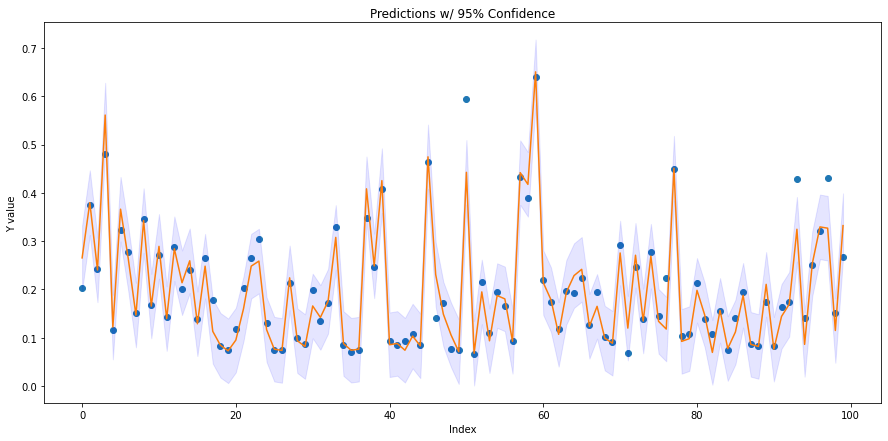

In [9]:
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, max_iter=40, gp2Scale_dask_client=client,
                          batchSize=400, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='3D_Road_ExactGP_DiscoverKernel_mean_variance_400_40')

root - INFO - MAX_INTER: 10, NUM_TRAIN:20004, BATCH_SIZE: 1000
root - INFO - 4. Init GP
py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: WARNING: gp2Scale activated. Only training via MCMC will be performed.                     Only noise variances (no noise covariances can be considered).                     A customed sparse kernel should be used, otherwise an anisotropic Wendland kernel is used.
  model = GP(input_space_dim, train_x, train_y, init_hps,

py.warnings - WARNING - E:\Congviec_DS\Notebook\gpmp\examples_scale\..\gpmp_scale\exactGP_discoverkernel\exactGP_DiscoverKernel.py:50: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  model = GP(input_space_dim, train_x, train_y, init_hps,



Transferring the covariance matrix to host done after  31.60651731491089  seconds. sparsity =  0.0022147440138047176
MINRES solve in progress ... 31.64703917503357 seconds.


root - INFO - 5. Standard Training


MINRES solve done after  31.89856266975403 seconds.
logdet() in progress ...  31.89856266975403 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  +1.040e+04   1.986e+02     1.910%    10     0       True

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos tol:                2.220e-16
data type:               

py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\mcmc.py:119: RuntimeWarning: overflow encountered in exp
  metr_ratio = np.exp(prior_star + likelihood_star -



                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -5.185e+04   9.828e+01     0.190%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent:                           1    lanczos degree:                    20
num matrix parameters:              0    lanczos tol:                2.220e-16
data type:                     64-bit    orthogonalization:               none

             convergence                          

Transferring the covariance matrix to host done after  6.8597376346588135  seconds. sparsity =  0.013613314129815509
MINRES solve in progress ... 7.035741329193115 seconds.
MINRES solve done after  8.020407915115356 seconds.
logdet() in progress ...  8.020407915115356 seconds.
                                    results                                   
     inquiries                            error            samples            
--------------------              ---------------------   ---------           
i         parameters       trace    absolute   relative   num   out  converged
1               none  -4.851e+04   8.818e+01     0.182%   100     0      False

                                    config                                    
                matrix                            stochastic estimator        
-------------------------------------    -------------------------------------
gram:                           False    method:                           slq
exponent: 

root - INFO - Training time: 131.00686860084534
py.warnings - WARNING - C:\Users\tamdx\tamdx_env\lib\site-packages\fvgp\gp.py:1209: UserWarning: You want to predict at >100 points. 
 When using gp2Scale, this takes a while. 
 Better predict at only a handful of points.
  if b.shape[1] > 100: warnings.warn(

root - INFO - Test MAE: 0.021871900246912473
root - INFO - Test RMSE: 0.037479465074648416


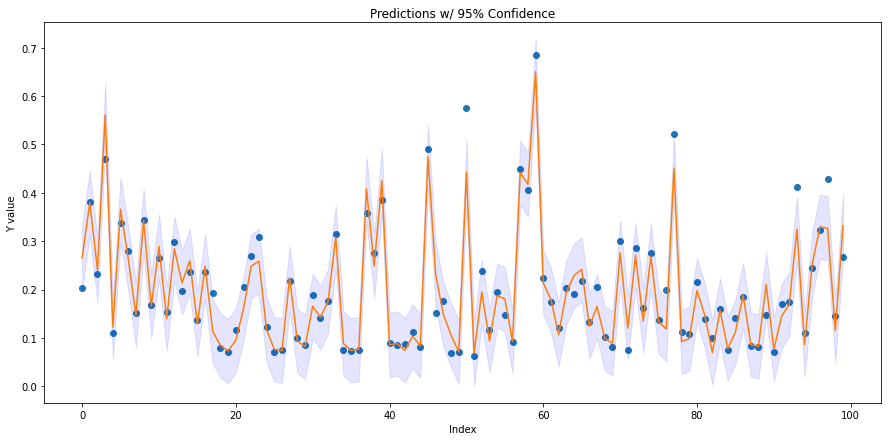

In [6]:
client = Client()
client.wait_for_workers(1)
model, train_time = train(train_x, train_y, INPUT_DIM, max_iter=10, gp2Scale_dask_client=client,
                          batchSize=1000, method='mcmc')

mean1, var1 = predict(model, test_x.reshape(-1, INPUT_DIM))
evaluate(test_y, mean1)

plot_mean_variance(test_y[:100], mean1[:100], saveFile='3D_Road_ExactGP_DiscoverKernel_mean_variance_1000_10')

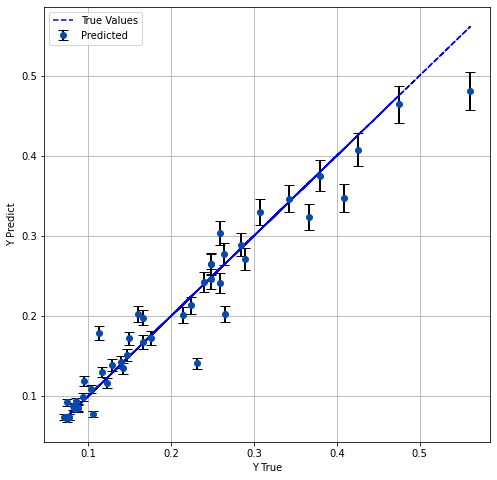

In [18]:
# batchSize: 400, iter: 40, MCMC
plot_95(test_y, mean1)